# Introduction to Image Convolution

1. dot product
2. dot product of 2D data
3. cross-correlation = a 2D result of dot products
4. convolution == 2D linear filter
    1. Smoothing
    1. Edge Detection: Sobel Operator
7. Nonlinear edge detection, Canny edge detector

In [9]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

import torch
from torch import nn
from d2l import torch as d2l

## 1. Dot Product

$ a = x \cdot y $, $a \in \mathbb{R}$

## 2. dot product of 2D vectors

$
a = x \cdot y
$

## 3. Cross-Correlation (Convolution in CNN)

1. kernel matrix (2D)
2. source matrix (2D)
3. scan and dot product
4. construct output 2D image

## 4. Convolution as 2D linear filter

* Ref: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html

1. Box filter for smoothing
$
    W = \frac{1}{9} [ [1, 1, 1], [1, 1, 1], [1, 1, 1]]  \in \mathbb{R}^2
$


2. A derivative filter for gradient approximation
$
    W = [ [-1, -2, 1], [0, 0, 0], [1, 2, 1]]  \in \mathbb{R}^2
$

$
    S = I * W
$

(256, 256, 3)


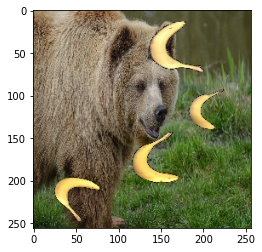

In [15]:
img = cv2.imread("../img/banana.jpg")
img = img[:,:,::-1]  # BGR -> RGB
print(img.shape)
plt.imshow(img);  # plt is for RGB display

(256, 256, 3)


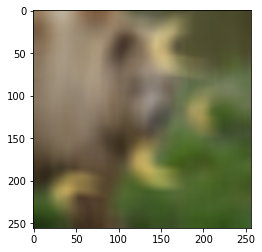

In [53]:
kernel = np.ones((25,25), np.float32) / 25**2
smoothed = cv2.filter2D(img, -1, kernel)  # applies conv2d to each channel
print(smoothed.shape)
plt.imshow(smoothed);

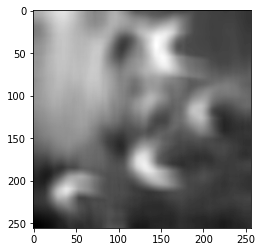

In [54]:
plt.imshow(smoothed[:,:,0], cmap='gray');  # red channel

### PyTorch

- pytorch is aimed to compute the kernel parameters, but here we see its computation only.

In [55]:
conv2d = nn.Conv2d(in_channels=1, 
                   out_channels=1, 
                   kernel_size=25, padding=25//2)
print(conv2d.weight.shape)
conv2d.weight.data[0,0,:2, :3]  # some of the weights

torch.Size([1, 1, 25, 25])


tensor([[ 0.0176,  0.0257,  0.0234],
        [-0.0051,  0.0223, -0.0289]])

In [56]:
conv2d.weight[:,:,:2,:3]

tensor([[[[ 0.0176,  0.0257,  0.0234],
          [-0.0051,  0.0223, -0.0289]]]], grad_fn=<SliceBackward>)

In [57]:
# copy the kernel into the weight of conv2d
for i in range(len(kernel)):
    for j in range(len(kernel[0])):
        conv2d.weight.data[0,0, i, j] = torch.tensor(kernel[i,j])

In [58]:
conv2d.weight[:,:,:2,:3]

tensor([[[[0.0016, 0.0016, 0.0016],
          [0.0016, 0.0016, 0.0016]]]], grad_fn=<SliceBackward>)

In [59]:
# Here, we consider 1 channel image only; multi channel image comes later
# batch x channel x height x width
batch_im = img[:,:,0].reshape(1, 1, 256,256) 
batch_im = torch.FloatTensor(batch_im)
print(batch_im.shape, batch_im.dtype)

torch.Size([1, 1, 256, 256]) torch.float32


torch.Size([1, 1, 256, 256]) torch.float32


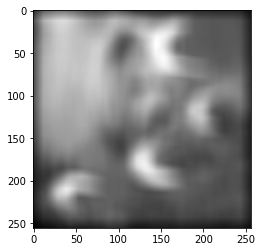

In [60]:
# just check the output shape
with torch.no_grad():  # we do not gradient here
    convout = conv2d (batch_im)

print(convout.shape, convout.dtype)
convout_im = convout.numpy()
convout_im = convout_im.reshape(256, 256)
plt.imshow(convout_im, cmap='gray');

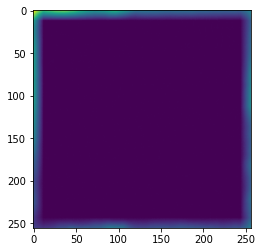

In [67]:
diff = np.abs(smoothed[:,:,0] - convout_im)
plt.imshow(diff); #, cmap='gray');

- The same results except for the boundary pixels
- PyTorch is to learn the kernel parameters, not to perform a pre-defined convolution operation.
- How to learn? Through SGD.
    - Supervised learning.

## Canny Operator
- Ref: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

- Edge map generation algorithm
    - binary edge map of single pixel width

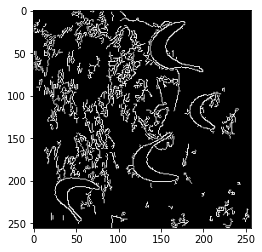

In [101]:
lowerTh = 130
edge_canny = cv2.Canny(img[:,:,0], threshold1=lowerTh, threshold2=3*lowerTh) # red channel
plt.imshow(edge_canny, cmap="gray")

# Assignment

1. Use random initialization of torch.conv2d; meaning that don't change the weight.
2. Compute (im, smoothed) image pair. this gives us 3 datasets.
3. Train the network so that its output produces the box filter.

4. Can you do the same thing for Canny edge detection?